<a href="https://colab.research.google.com/github/BlossomByte04/Crop-Management-and-Disease-Detection-Using-Machine-Learning-/blob/main/Copy_of_Crop_Recommendation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/crop_recommendation.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<Axes: >

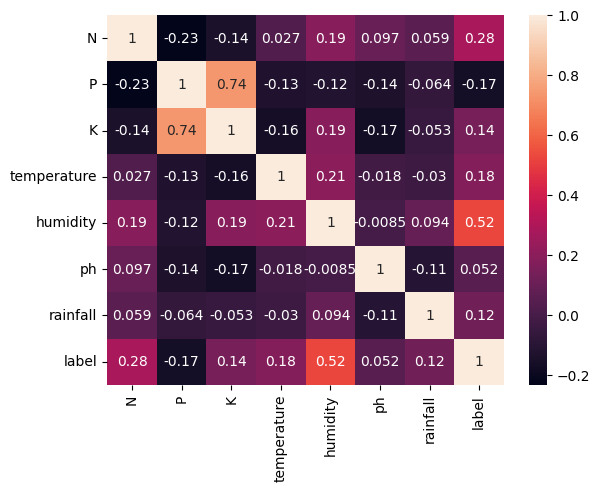

In [ ]:
df['label'], _ = pd.factorize(df['label'])
sns.heatmap(df.corr(), annot=True)

### Seperating features and target label

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       0.00      0.00      0.00        14
           4       0.62      1.00      0.77        18
           5       0.00      0.00      0.00        19
           6       1.00      1.00      1.00        24
           7       0.59      1.00      0.74        16
           8       0.68      1.00      0.81        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00   

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.85909091, 0.93636364])

### Saving trained Decision Tree model

In [ ]:
import pickle

DT_pkl_filename = '/content/DecisionTree.pkl'

DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)

DT_Model_pkl.close()

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00  

In [ ]:

score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [ ]:
import pickle

NB_pkl_filename = '/content/NBClassifier.pkl'

NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)

X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.0

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.97727273, 0.98863636, 0.98863636, 0.98181818])

In [ ]:
import pickle

SVM_pkl_filename = '/content/SVMClassifier.pkl'

SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)

SVM_Model_pkl.close()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.90      0.86      0.88        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       0.84      0.84      0.84        19
           6       1.00      0.96      0.98        24
           7       0.86      0.75      0.80        16
           8       0.88      1.00      0.94        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00   

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [ ]:
import pickle

LR_pkl_filename = '/content/LogisticRegression.pkl'

LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)

LR_Model_pkl.close()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       0.95      1.00      0.97        18
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00 

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [ ]:
import pickle

RF_pkl_filename = '/content/RandomForest.pkl'

RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

RF_Model_pkl.close()

# XGBoost

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       0.96      1.00      0.98        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      

In [ ]:

score = cross_val_score(XB,features,target,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [ ]:
import pickle

XB_pkl_filename = '/content/XGBoost.pkl'

XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)

XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

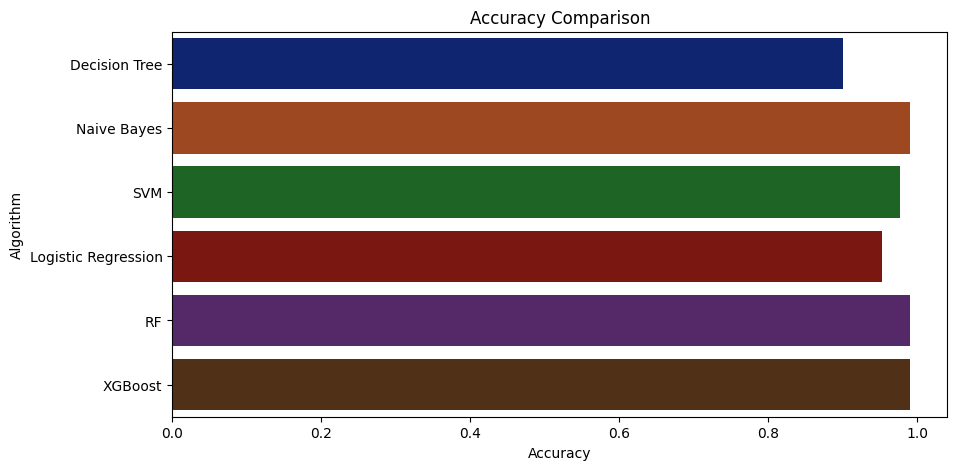

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9772727272727273
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.990909090909091


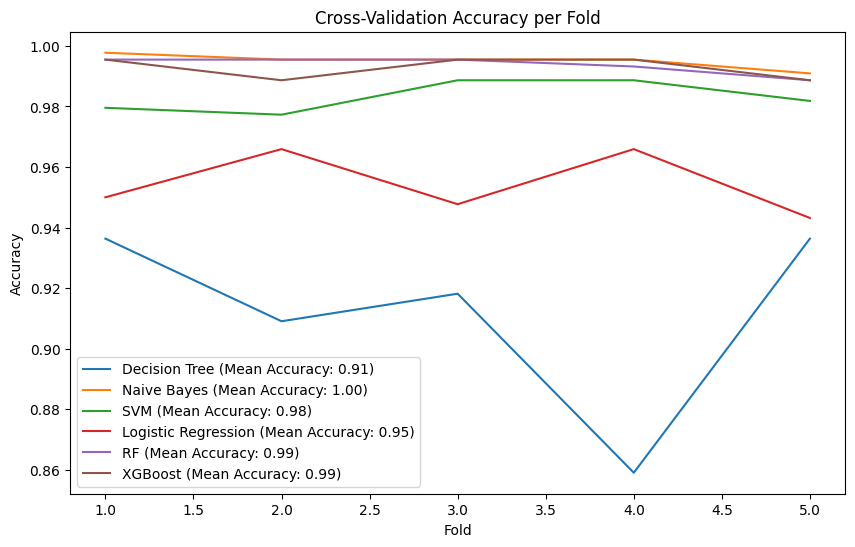

Cross-Validation Accuracy (Mean ± Std Dev):
Decision Tree: 0.91 ± 0.03
Naive Bayes: 1.00 ± 0.00
SVM: 0.98 ± 0.00
Logistic Regression: 0.95 ± 0.01
RF: 0.99 ± 0.00
XGBoost: 0.99 ± 0.00


In [ ]:
# Importing required libraries for plotting
import matplotlib.pyplot as plt

# Calculating cross-validation accuracy and storing results
cv_scores = {}
for mdl, name in zip([DecisionTree, NaiveBayes, SVM, LogReg, RF, XB], model):
    score = cross_val_score(mdl, features, target, cv=5)
    cv_scores[name] = score

# Plotting cross-validation accuracy for each model
plt.figure(figsize=[10, 6], dpi=100)
for name, score in cv_scores.items():
    plt.plot(range(1, 6), score, label=f'{name} (Mean Accuracy: {np.mean(score):.2f})')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculating and displaying mean and standard deviation of accuracy for each model
print("Cross-Validation Accuracy (Mean ± Std Dev):")
for name, score in cv_scores.items():
    print(f"{name}: {np.mean(score):.2f} ± {np.std(score):.2f}")


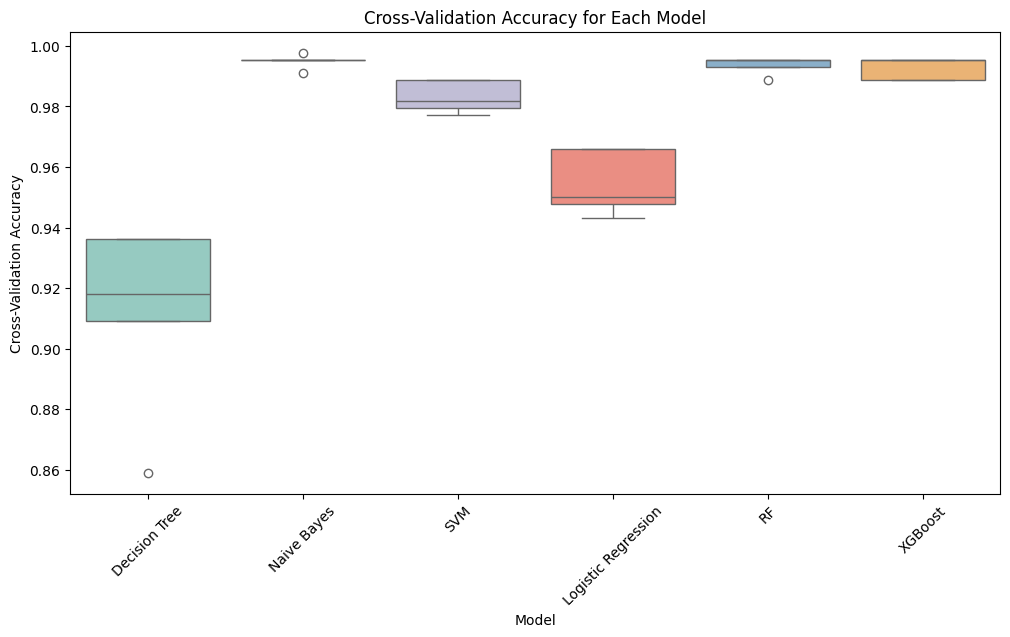

In [ ]:
import seaborn as sns

# Organize cross-validation results for seaborn
cv_data = []
for name, scores in cv_scores.items():
    for score in scores:
        cv_data.append([name, score])

# Convert to DataFrame
cv_df = pd.DataFrame(cv_data, columns=['Model', 'Cross-Validation Accuracy'])

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Cross-Validation Accuracy', data=cv_df, palette="Set3")
plt.title('Cross-Validation Accuracy for Each Model')
plt.xticks(rotation=45)
plt.show()


## Making a prediction

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[21]


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[20]
